In [3]:
import create_model
import numpy as np
import os
# Change simulation parameters here
temperature = 25  # in degC, valid values: 0, 10, 25
crate = 1         # valid values: 0.5, 1, 2
cell_selected = ["789"]   # select the cell to optimize
param_optimised={"Negative electrode diffusivity [m2.s-1]":(5e-14,(2.06e-16,2.06e-12)),
                 "Negative electrode reaction coefficient":(6.48e-7,(2.18589831e-9,2.18589831e-5)),
                 "Total heat transfer coefficient [W.m-2.K-1]":(20,(0.1,1000)),
                 ("Positive current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative electrode specific heat capacity [J.kg-1.K-1]",
                  "Separator specific heat capacity [J.kg-1.K-1]",
                  "Positive electrode specific heat capacity [J.kg-1.K-1]"):(2.85e3,(2.85, 2.85e6))
                 }
model=create_model.model_build(temperature, crate, cell_selected, param_optimised)
x0, bounds = model.get_values()

In [4]:
import time
from scipy import optimize
print("start optimization")
start = time.process_time()
print(start)
minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0, workers=-1, updating='deferred', polish=False)
end = time.process_time()
print(end)
print(end - start)
print("end optimization")

start optimization
15.9375


2022-07-28 13:48:54.441 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:48:54.732 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:28.562 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:28.908 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:40.230 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:40.481 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:54.869 - [WARNING] processed_variable.__call__(486): Calling variable outside interpolation range (returns 'nan')
2022-07-28 13:49:55.060 - [WARNING] processed_variable.__call__(486): Calling varia

20.953125
5.015625
end optimization


Initial function value: 0.024381720690227652
Optimized function value: 0.015507049772406417
Optimized values are: [1.41109054e-14]


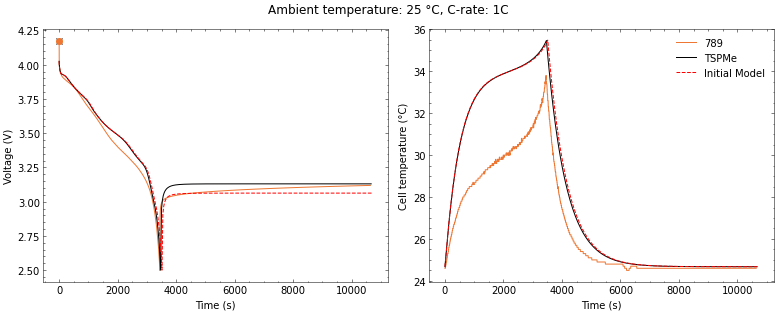

In [5]:
print("Initial function value: %s" %model.fitness(x0))

print("Optimized function value: %s" %model.fitness(minimum.x))

print("Optimized values are: %s" %minimum.x)

model.define_model(minimum.x)

model.model_plot()

In [ ]:
minimum

In [ ]:
"Negative electrode reaction coefficient":(6.48e-7,(2.18589831e-9,2.18589831e-5)),
                 "Total heat transfer coefficient [W.m-2.K-1]":(20,(0.1,1000)),
                 ("Positive current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative electrode specific heat capacity [J.kg-1.K-1]",
                  "Separator specific heat capacity [J.kg-1.K-1]",
                  "Positive electrode specific heat capacity [J.kg-1.K-1]"):(2.85e3,(2.85, 2.85e6)),

In [ ]:
model.fmin()

In [ ]:
model.fitness(x0)

In [ ]:
from scipy import optimize
x0 =np.array([5e-14,6.48e-7,20,2.85e3]) # Initial values of parameters
# Create bounds
#max_bound = np.array([ 2.06e-12, 2.18589831e-5,1000,2.85e6])
#min_bound = np.array([ 2.06e-16, 2.18589831e-9,0.1,2.85])

#bounds of the variables as (min,max) {This might need adjustment according to the optimization method.}
bounds = [(2.06e-16,2.06e-12),(2.18589831e-9,2.18589831e-5),(0.1,1000),(2.85, 2.85e6)] 


#model.fitness(x0) #initial value of the function

In [ ]:
def maplike_fun(func, iterable):
    # x.shape == (S, N), where S is the size of the population and N
    # is the number of parameters. This is where you'd call out from
    # Python to COMSOL, instead of the following line.
    return func(iterable.T)

In [ ]:
from scipy import optimize
minimum=optimize.differential_evolution(model.fitness, bounds, x0=x0, workers=maplike_fun, polish=False, updating='deferred')

In [ ]:
%time # time the solver
from scipy import optimize
import multiprocessing as mp
pool = mp.Pool(4)
minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0, workers=-1, updating='deferred')

In [ ]:
minimum

In [ ]:
import time
from scipy import optimize
print("start optimization")
start = time.process_time()
print(start)
minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0)
end = time.process_time()
print(end)
print(end - start)
print("end optimization")

In [ ]:

param_optimised=list(param_optimised)
for index,item in enumerate(param_optimised):
    #param_optimised.remove(item)
    if item == str('Negative electrode exchange-current density [A.m-2]'):
        param_optimised[index]= 'Negative electrode exchange-current density [A.m-2] : j0_neg'
        #param_optimised.add(item)
    else :
        param_optimised[index] = str(item) + str(' : "[input]"')
        #param_optimised.add(item)


In [ ]:
param_optimised

In [ ]:
for item in param_optimised:
    print(item)

In [ ]:
str('Negative electrode exchange-current density [A.m-2]')

In [ ]:
set(param_optimised)

In [ ]:
import pybamm
pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)

In [ ]:
param_optimised[("Positive current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative electrode specific heat capacity [J.kg-1.K-1]",
                  "Separator specific heat capacity [J.kg-1.K-1]",
                  "Positive electrode specific heat capacity [J.kg-1.K-1]")][1]

In [ ]:
param_optimised={"Negative electrode diffusivity [m2.s-1]":(5e-14,(2.06e-16,2.06e-12)),
                 "Negative electrode reaction coefficient":(6.48e-7,(2.18589831e-9,2.18589831e-5)),
                 "Total heat transfer coefficient [W.m-2.K-1]":(20,(0.1,1000)),
                 ("Positive current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative current collector specific heat capacity [J.kg-1.K-1]",
                  "Negative electrode specific heat capacity [J.kg-1.K-1]",
                  "Separator specific heat capacity [J.kg-1.K-1]",
                  "Positive electrode specific heat capacity [J.kg-1.K-1]"):(2.85e3,(2.85, 2.85e6)),
                 }

In [ ]:
import numpy as np
prm_updt={}
prm_func={}
x0=np.empty([len(param_optimised)])
bounds=[None]*len(param_optimised)
#x=[None]*len(param_optimised)
for index,item in enumerate(param_optimised):
    if type(item)==str:
        prm_updt[item]="[input]"
        prm_func[item]='x[%s]'%index
        x0[index]=param_optimised[item][0]
        bounds[index]=param_optimised[item][1]
    elif type(item)==tuple:
        i=0
        for i in range(len(item)):
            prm_updt[item[i]]="[input]"
            prm_func[item[i]]='x[%s]'%index
        x0[index]=param_optimised[item][0]
        bounds[index]=param_optimised[item][1]
    else:
        print('data type is not supported')


In [ ]:
param_optimised['Negative electrode diffusivity [m2.s-1]'][1]


In [ ]:
bounds

In [ ]:
prm_func

In [ ]:
x=x0

In [ ]:
{k:exec(v) for k, v in prm_func.items()}

In [ ]:
for index,item in enumerate(param_optimised):
    if type(item)==str:
        prm_func[item]=x[index]
    elif type(item)==tuple:
        i=0
        for i in range(len(item)):
            prm_func[item[i]]=x[index]